In [1]:
!pip install scikit-learn pandas --upgrade --quiet

In [2]:
import pandas as pd

In [6]:
raw_df = pd.read_csv('breast_cancer.csv')

In [7]:
raw_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
raw_df.dropna(subset = ['diagnosis'], inplace = True)

In [10]:
!pip install plotly.express matplotlib seaborn --quiet

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
px.histogram(raw_df, x='radius_mean', title = 'Radius vs Diagnosis', color = 'diagnosis')

In [14]:
px.histogram(raw_df, x='radius_worst', title = 'Radius vs Diagnosis', color = 'diagnosis')

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42) 

In [17]:
train_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
217,8811779,B,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,0.3567,1.9220,2.747,22.79,0.004680,0.031200,0.057740,0.010710,0.02560,0.004613,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809,NaN
283,8912280,M,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,0.2873,0.9173,2.464,28.09,0.004563,0.034810,0.038720,0.012090,0.01388,0.004081,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630,NaN
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890,NaN
504,915186,B,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.045420,0.034830,0.021880,0.02542,0.010450,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520,NaN
251,88518501,B,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,0.3927,0.8429,2.684,26.99,0.006380,0.010650,0.012450,0.009175,0.02292,0.001461,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,857793,M,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,0.4226,1.1500,2.735,40.09,0.003659,0.028550,0.025720,0.012720,0.01817,0.004108,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940,NaN
492,914062,M,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,0.7548,1.2880,5.353,89.74,0.007997,0.027000,0.037370,0.016480,0.02897,0.003996,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625,NaN
418,906024,B,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,0.2253,0.6457,1.527,17.37,0.006131,0.012630,0.009075,0.008231,0.01713,0.004414,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464,NaN
385,90291,M,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,0.4157,1.6270,2.914,33.01,0.008312,0.017420,0.033890,0.015760,0.01740,0.002871,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836,NaN


In [18]:
test_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
204,87930,B,12.47,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,0.3961,1.0440,2.497,30.29,0.006953,0.01911,0.02701,0.010370,0.01782,0.003586,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750,NaN
70,859575,M,18.94,21.31,123.60,1130.0,0.09009,0.10290,0.10800,0.07951,0.1582,0.05461,0.7888,0.7975,5.486,96.05,0.004444,0.01652,0.02269,0.013700,0.01386,0.001698,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589,NaN
131,8670,M,15.46,19.48,101.70,748.9,0.10920,0.12230,0.14660,0.08087,0.1931,0.05796,0.4743,0.7859,3.094,48.31,0.006240,0.01484,0.02813,0.010930,0.01397,0.002461,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019,NaN
431,907915,B,12.40,17.68,81.47,467.8,0.10540,0.13160,0.07741,0.02799,0.1811,0.07102,0.1767,1.4600,2.204,15.43,0.010000,0.03295,0.04861,0.011670,0.02187,0.006005,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359,NaN
540,921385,B,11.54,14.44,74.65,402.9,0.09984,0.11200,0.06737,0.02594,0.1818,0.06782,0.2784,1.7680,1.628,20.86,0.012150,0.04112,0.05553,0.014940,0.01840,0.005512,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
486,913102,B,14.64,16.85,94.21,666.0,0.08641,0.06698,0.05192,0.02791,0.1409,0.05355,0.2204,1.0060,1.471,19.98,0.003535,0.01393,0.01800,0.006144,0.01254,0.001219,16.46,25.44,106.00,831.0,0.1142,0.2070,0.2437,0.07828,0.2455,0.06596,NaN
75,8610404,M,16.07,19.65,104.10,817.7,0.09168,0.08424,0.09769,0.06638,0.1798,0.05391,0.7474,1.0160,5.029,79.25,0.010820,0.02203,0.03500,0.018090,0.01550,0.001948,19.77,24.56,128.80,1223.0,0.1500,0.2045,0.2829,0.15200,0.2650,0.06387,NaN
249,884689,B,11.52,14.93,73.87,406.3,0.10130,0.07808,0.04328,0.02929,0.1883,0.06168,0.2562,1.0380,1.686,18.62,0.006662,0.01228,0.02105,0.010060,0.01677,0.002784,12.65,21.19,80.88,491.8,0.1389,0.1582,0.1804,0.09608,0.2664,0.07809,NaN
238,883270,B,14.22,27.85,92.55,623.9,0.08223,0.10390,0.11030,0.04408,0.1342,0.06129,0.3354,2.3240,2.105,29.96,0.006307,0.02845,0.03850,0.010110,0.01185,0.003589,15.75,40.54,102.50,764.0,0.1081,0.2426,0.3064,0.08219,0.1890,0.07796,NaN


In [19]:
val_df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
95,86208,M,20.26,23.03,132.40,1264.0,0.09078,0.13130,0.14650,0.08683,0.2095,0.05649,0.7576,1.5090,4.554,87.870,0.006016,0.034820,0.042320,0.012690,0.02657,0.004411,24.220,31.59,156.10,1750.0,0.1190,0.35390,0.40980,0.15730,0.3689,0.08368,NaN
93,862009,B,13.45,18.30,86.60,555.1,0.10220,0.08165,0.03974,0.02780,0.1638,0.05710,0.2950,1.3730,2.099,25.220,0.005884,0.014910,0.018720,0.009366,0.01884,0.001817,15.100,25.94,97.59,699.4,0.1339,0.17510,0.13810,0.07911,0.2678,0.06603,NaN
401,904647,B,11.93,10.91,76.14,442.7,0.08872,0.05242,0.02606,0.01796,0.1601,0.05541,0.2522,1.0450,1.649,18.950,0.006175,0.012040,0.013760,0.005832,0.01096,0.001857,13.800,20.14,87.64,589.5,0.1374,0.15750,0.15140,0.06876,0.2460,0.07262,NaN
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,0.1633,0.07005,0.3380,2.5090,2.394,19.330,0.017360,0.046710,0.026110,0.012960,0.03675,0.006758,10.880,19.48,70.89,357.1,0.1360,0.16360,0.07162,0.04074,0.2434,0.08488,NaN
194,87556202,M,14.86,23.21,100.40,671.4,0.10440,0.19800,0.16970,0.08878,0.1737,0.06672,0.2796,0.9622,3.591,25.200,0.008081,0.051220,0.055510,0.018830,0.02545,0.004312,16.080,27.78,118.60,784.7,0.1316,0.46480,0.45890,0.17270,0.3000,0.08701,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,8810703,M,28.11,18.47,188.50,2499.0,0.11420,0.15160,0.32010,0.15950,0.1648,0.05525,2.8730,1.4760,21.980,525.600,0.013450,0.027720,0.063890,0.014070,0.04783,0.004476,28.110,18.47,188.50,2499.0,0.1142,0.15160,0.32010,0.15950,0.1648,0.05525,NaN
15,84799002,M,14.54,27.54,96.73,658.8,0.11390,0.15950,0.16390,0.07364,0.2303,0.07077,0.3700,1.0330,2.879,32.550,0.005607,0.042400,0.047410,0.010900,0.01857,0.005466,17.460,37.13,124.10,943.2,0.1678,0.65770,0.70260,0.17120,0.4218,0.13410,NaN
428,90769601,B,11.13,16.62,70.47,381.1,0.08151,0.03834,0.01369,0.01370,0.1511,0.06148,0.1415,0.9671,0.968,9.704,0.005883,0.006263,0.009398,0.006189,0.02009,0.002377,11.680,20.29,74.35,421.1,0.1030,0.06219,0.04580,0.04044,0.2383,0.07083,NaN
363,9010872,B,16.50,18.29,106.60,838.1,0.09686,0.08468,0.05862,0.04835,0.1495,0.05593,0.3389,1.4390,2.344,33.580,0.007257,0.018050,0.018320,0.010330,0.01694,0.002001,18.130,25.45,117.20,1009.0,0.1338,0.16790,0.16630,0.09123,0.2394,0.06469,NaN


In [24]:
input_cols = list(train_df.columns)[2:-1]
target_col = 'diagnosis'

In [26]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_targets = test_df[target_col].copy()

In [29]:
!pip install numpy --quiet

In [30]:
import numpy as np

In [31]:
numeric_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [32]:
train_inputs[numeric_cols]

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,0.3567,1.9220,2.747,22.79,0.004680,0.031200,0.057740,0.010710,0.02560,0.004613,11.48,24.47,75.40,403.7,0.09527,0.1397,0.19250,0.03571,0.2868,0.07809
283,16.240,18.77,108.80,805.1,0.10660,0.18020,0.19480,0.09052,0.1876,0.06684,0.2873,0.9173,2.464,28.09,0.004563,0.034810,0.038720,0.012090,0.01388,0.004081,18.55,25.09,126.90,1031.0,0.13650,0.4706,0.50260,0.17320,0.2770,0.10630
0,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.049040,0.053730,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.16220,0.6656,0.71190,0.26540,0.4601,0.11890
504,9.268,12.87,61.49,248.7,0.16340,0.22390,0.09730,0.05252,0.2378,0.09502,0.4076,1.0930,3.014,20.04,0.009783,0.045420,0.034830,0.021880,0.02542,0.010450,10.28,16.38,69.05,300.2,0.19020,0.3441,0.20990,0.10250,0.3038,0.12520
251,11.500,18.45,73.28,407.4,0.09345,0.05991,0.02638,0.02069,0.1834,0.05934,0.3927,0.8429,2.684,26.99,0.006380,0.010650,0.012450,0.009175,0.02292,0.001461,12.97,22.46,83.12,508.9,0.11830,0.1049,0.08105,0.06544,0.2740,0.06487
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,0.4226,1.1500,2.735,40.09,0.003659,0.028550,0.025720,0.012720,0.01817,0.004108,17.87,30.70,115.70,985.5,0.13680,0.4290,0.35870,0.18340,0.3698,0.10940
492,18.010,20.56,118.40,1007.0,0.10010,0.12890,0.11700,0.07762,0.2116,0.06077,0.7548,1.2880,5.353,89.74,0.007997,0.027000,0.037370,0.016480,0.02897,0.003996,21.53,26.06,143.40,1426.0,0.13090,0.2327,0.25440,0.14890,0.3251,0.07625
418,12.700,12.17,80.88,495.0,0.08785,0.05794,0.02360,0.02402,0.1583,0.06275,0.2253,0.6457,1.527,17.37,0.006131,0.012630,0.009075,0.008231,0.01713,0.004414,13.65,16.92,88.12,566.9,0.13140,0.1607,0.09385,0.08224,0.2775,0.09464
385,14.600,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,0.4157,1.6270,2.914,33.01,0.008312,0.017420,0.033890,0.015760,0.01740,0.002871,15.79,31.71,102.20,758.2,0.13120,0.1581,0.26750,0.13590,0.2477,0.06836


In [34]:
from sklearn.impute import SimpleImputer

In [35]:
imputer = SimpleImputer(strategy = 'mean')

In [37]:
raw_df[numeric_cols].isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [38]:
train_inputs[numeric_cols].isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [39]:
imputer.fit(raw_df[numeric_cols])

SimpleImputer()

In [40]:
list(imputer.statistics_)

[14.127291739894552,
 19.289648506151142,
 91.96903339191564,
 654.8891036906855,
 0.0963602811950791,
 0.10434098418277679,
 0.0887993158172232,
 0.04891914586994728,
 0.18116186291739894,
 0.06279760984182776,
 0.40517205623901575,
 1.2168534270650264,
 2.8660592267135327,
 40.337079086116,
 0.007040978910369069,
 0.025478138840070295,
 0.03189371634446397,
 0.011796137082601054,
 0.02054229876977153,
 0.0037949038664323374,
 16.269189806678387,
 25.677223198594024,
 107.26121265377857,
 880.5831282952548,
 0.13236859402460457,
 0.25426504393673116,
 0.27218848330404216,
 0.11460622319859401,
 0.2900755711775044,
 0.0839458172231986]

In [41]:
train_inputs[numeric_cols] = imputer.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = imputer.transform(test_inputs[numeric_cols])

In [42]:
train_inputs[numeric_cols].isna().sum()

radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [43]:
from sklearn.preprocessing import MinMaxScaler

In [44]:
scaler = MinMaxScaler()

In [45]:
scaler.fit(raw_df[numeric_cols])

MinMaxScaler()

In [46]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])
test_inputs[numeric_cols] = scaler.transform(test_inputs[numeric_cols])

In [47]:
train_inputs[numeric_cols].describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000,341.000000
mean,0.332268,0.318504,0.326451,0.211712,0.390940,0.254246,0.200232,0.234369,0.383871,0.269382,0.104144,0.183926,0.097366,0.061159,0.178171,0.171479,0.079714,0.222851,0.180419,0.099058,0.291555,0.358350,0.278217,0.167458,0.398758,0.215037,0.210895,0.386814,0.266614,0.187798
std,0.164389,0.141954,0.165191,0.146545,0.130450,0.165308,0.185427,0.189919,0.142330,0.156107,0.099788,0.115682,0.094246,0.084092,0.105857,0.142961,0.079317,0.122893,0.120438,0.096749,0.172374,0.159304,0.167639,0.142196,0.154633,0.152456,0.160643,0.227713,0.126462,0.118234
min,0.033603,0.000000,0.028540,0.011410,0.000000,0.000000,0.000000,0.000000,0.054040,0.000000,0.000000,0.000000,0.004095,0.000000,0.032430,0.000000,0.000000,0.000000,0.000000,0.000000,0.026610,0.000000,0.020320,0.009438,0.066565,0.006821,0.000000,0.000000,0.000000,0.000000
25%,0.220029,0.223537,0.213461,0.114146,0.299630,0.129471,0.061809,0.095626,0.282828,0.161542,0.042839,0.104690,0.038637,0.020560,0.112146,0.075916,0.036212,0.141030,0.100298,0.045023,0.179651,0.244136,0.165347,0.080785,0.282837,0.107508,0.086821,0.216357,0.189237,0.102781
50%,0.294335,0.308083,0.288093,0.167508,0.377088,0.205632,0.135286,0.161531,0.373232,0.246420,0.073149,0.159742,0.069170,0.032720,0.158276,0.131117,0.062828,0.207805,0.153346,0.077256,0.248310,0.351812,0.232880,0.120306,0.390477,0.173094,0.171805,0.338866,0.251528,0.161157
75%,0.410762,0.400744,0.407781,0.260912,0.471879,0.338998,0.285380,0.336581,0.457576,0.338037,0.122180,0.235988,0.113980,0.069384,0.213890,0.217412,0.103359,0.274673,0.211600,0.122307,0.361793,0.463486,0.358534,0.205417,0.494156,0.304945,0.300240,0.537801,0.317564,0.242818
max,0.967343,1.000000,0.988943,1.000000,1.000000,0.895712,1.000000,1.000000,0.850000,1.000000,0.881948,0.726397,0.843095,1.000000,1.000000,1.000000,1.000000,1.000000,0.753898,1.000000,1.000000,1.000000,1.000000,1.000000,0.972264,0.883478,0.767412,1.000000,1.000000,0.773711


In [48]:
raw_df[categorical_cols].nunique()

Series([], dtype: float64)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
model = LogisticRegression(solver = 'liblinear')

In [51]:
model.fit(train_inputs[numeric_cols], train_targets)

LogisticRegression(solver='liblinear')

In [52]:
model.coef_

array([[ 0.73144219,  0.88977709,  0.8004858 ,  0.98143033, -0.3708857 ,
         0.5827613 ,  1.75496447,  2.14879933, -0.37742487, -1.31886504,
         0.96161731, -0.47090222,  0.73414125,  0.72423358, -0.37630794,
        -0.44955338, -0.18722107, -0.20519056, -0.4504982 , -0.60526502,
         1.40172548,  1.30744434,  1.301633  ,  1.25630924,  0.47344399,
         0.92503359,  1.48337318,  2.03723332,  0.88303694,  0.12997147]])

In [53]:
model.intercept_

array([-4.89869569])

In [54]:
x_train = train_inputs[numeric_cols]
x_val = val_inputs[numeric_cols]
x_test = test_inputs[numeric_cols]

In [55]:
train_preds = model.predict(x_train)

In [59]:
train_preds

array(['B', 'M', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B',
       'B', 'M', 'M', 'M', 'B', 'M', 'B', 'M', 'B', 'M', 'M', 'B', 'M',
       'B', 'B', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'B', 'M', 'M', 'M',
       'B', 'M', 'M', 'M', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B',
       'M', 'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B

In [57]:
train_targets

217    B
283    M
0      M
504    B
251    B
      ..
57     M
492    M
418    B
385    M
325    B
Name: diagnosis, Length: 341, dtype: object

In [60]:
train_probs = model.predict_proba(x_train)

In [61]:
train_probs

array([[9.61267008e-01, 3.87329924e-02],
       [1.46798942e-01, 8.53201058e-01],
       [5.95677230e-03, 9.94043228e-01],
       [9.64571030e-01, 3.54289696e-02],
       [9.26428895e-01, 7.35711054e-02],
       [9.72445661e-01, 2.75543390e-02],
       [8.94751996e-01, 1.05248004e-01],
       [8.04136713e-01, 1.95863287e-01],
       [4.93165187e-01, 5.06834813e-01],
       [8.78194334e-01, 1.21805666e-01],
       [8.89227500e-01, 1.10772500e-01],
       [1.99097918e-01, 8.00902082e-01],
       [8.30767199e-01, 1.69232801e-01],
       [6.07484444e-01, 3.92515556e-01],
       [8.96178726e-01, 1.03821274e-01],
       [1.37967707e-01, 8.62032293e-01],
       [9.69004926e-01, 3.09950738e-02],
       [9.44135883e-01, 5.58641174e-02],
       [9.15381877e-01, 8.46181235e-02],
       [2.59863260e-02, 9.74013674e-01],
       [9.23142285e-01, 7.68577147e-02],
       [9.17672112e-01, 8.23278879e-02],
       [9.59649911e-01, 4.03500890e-02],
       [2.01147976e-02, 9.79885202e-01],
       [6.948451

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(train_targets, train_preds)

0.9736070381231672

In [64]:
from sklearn.metrics import confusion_matrix

In [65]:
confusion_matrix(train_targets, train_preds, normalize = 'true')

array([[0.99537037, 0.00462963],
       [0.064     , 0.936     ]])

In [66]:
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    
    accuracy = accuracy_score(targets, preds)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure()
    sns.heatmap(cf, annot=True)
    plt.xlabel('Prediction')
    plt.ylabel('Target')
    plt.title('{} Confusion Matrix'.format(name));
    
    return preds

Accuracy: 97.36%


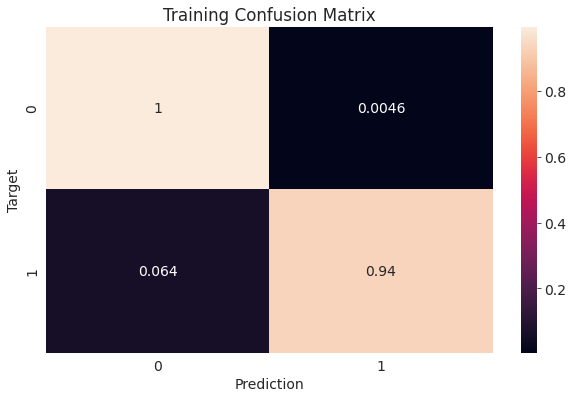

In [67]:
train_preds = predict_and_plot(x_train, train_targets, 'Training')

Accuracy: 95.61%


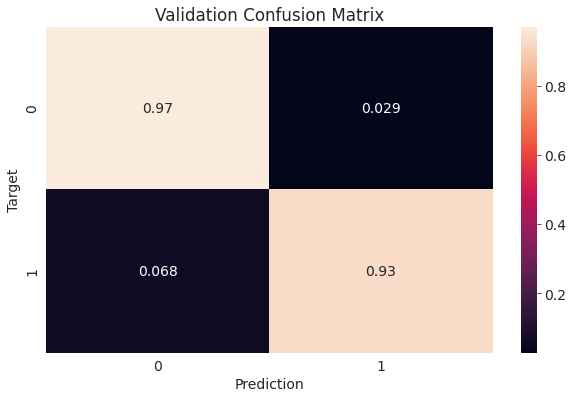

In [68]:
val_preds = predict_and_plot(x_val, val_targets, 'Validation')

Accuracy: 96.49%


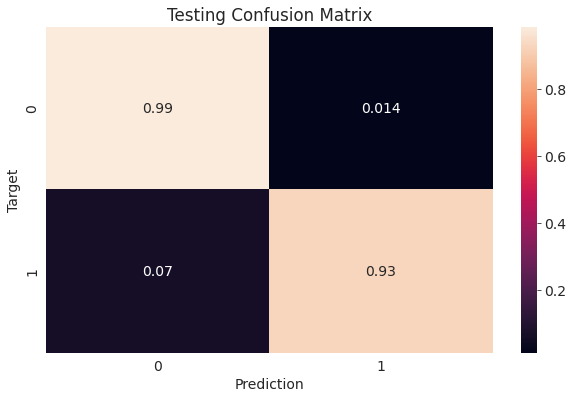

In [69]:
test_preds = predict_and_plot(x_test, test_targets, 'Testing')